In [1]:
import pandas as pd

In [2]:
# %pip install lxml matplotlib

# Religion

In [3]:
religion_dfs = pd.read_html("https://en.wikipedia.org/wiki/Religions_by_country")

In [4]:
relevant_dfs = []

In [5]:
for df in religion_dfs:
    try:
        if df.columns[0]==('Country', 'Country'):
            relevant_dfs += [df]
    except ValueError:
        continue

In [6]:
religion_df = pd.concat(relevant_dfs)

In [7]:
index_col = ("Country","Country")

In [8]:
religion_df = religion_df.sort_values(index_col)

In [9]:
religion_df = religion_df.set_index(index_col)

In [10]:
religion_df[("Muslim","%")] = pd.to_numeric(religion_df[("Muslim","%")], errors="coerce")
religion_df[("Christian","%")] = pd.to_numeric(religion_df[("Christian","%")], errors="coerce")
religion_df[("Irreligion","%")] = pd.to_numeric(religion_df[("Irreligion","%")], errors="coerce")
religion_df[("Hindu","%")] = pd.to_numeric(religion_df[("Hindu","%")], errors="coerce")
religion_df[("Pagan","%")] = pd.to_numeric(religion_df[("Pagan","%")], errors="coerce")
religion_df[("Paganism/Neo-Paganism","%")] = pd.to_numeric(religion_df[("Paganism/Neo-Paganism","%")], errors="coerce")

In [85]:
religion_df.to_csv("/Users/jvalansi/Downloads/religion.tsv", sep='\t')

# GDP

In [13]:
gdp_dfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita")

In [14]:
gdp_df = gdp_dfs[1]

In [15]:
index_col = ("Country/Territory","Country/Territory")

In [16]:
gdp_df[index_col] = gdp_df[index_col].str.strip(' *')

In [17]:
gdp_df = gdp_df.sort_values(index_col)

In [18]:
gdp_df = gdp_df.set_index(index_col)

In [19]:
gdp_df[("World Bank[7]","Estimate")] = pd.to_numeric(gdp_df[("World Bank[7]","Estimate")], errors="coerce")

# Homicide

In [20]:
homicide_dfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_intentional_homicide_rate")

In [21]:
homicide_df = homicide_dfs[2]

In [22]:
index_col = "Location"

In [23]:
homicide_df[index_col] = homicide_df[index_col].str.strip(' *')

In [24]:
homicide_df = homicide_df.set_index(index_col)

# Corruption

In [26]:
corruption_dfs = pd.read_html("https://en.wikipedia.org/wiki/Corruption_Perceptions_Index")

In [27]:
corruption_df = corruption_dfs[4]

In [30]:
index_col = corruption_df.columns[1]

In [32]:
corruption_df = corruption_df.sort_values(index_col)

In [33]:
corruption_df = corruption_df.set_index(index_col)

In [57]:
corruption_df[( '2023[5]', 'Score')] = pd.to_numeric(corruption_df[('2023[5]','Score')], errors="coerce")

# Combine

In [35]:
df = religion_df

In [36]:
df['gdp'] = gdp_df[("World Bank[7]","Estimate")]

In [37]:
df['homicide'] = homicide_df["Rate"]

In [58]:
df['corruption'] = corruption_df[('2023[5]','Score')]

/var/folders/9p/k_4f02t961360ccdlst6p_fc0000gn/T/ipykernel_42233/3175976103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['corruption'] = corruption_df[('2023[5]','Score')]


In [225]:
# df.dropna(subset=[('gdp','')])

In [226]:
# df.dropna(subset=[('homicide','')])

In [39]:
df = df.iloc[1:]

In [40]:
df[[("Muslim","%"),("homicide","")]].corr()

,,Muslim,homicide
,,%,
Muslim,%,1.0000,-0.2613
homicide,,-0.2613,1.0000


<Axes: xlabel='(Muslim, %)', ylabel='(homicide, )'>

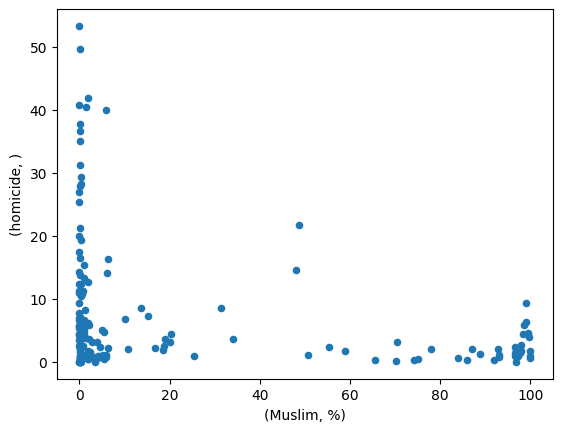

In [41]:
df[[("Muslim","%"),("homicide","")]].plot.scatter(x=("Muslim","%"),y=("homicide",""))

In [42]:
df[[("gdp",""),("homicide","")]].corr()

,,gdp,homicide
,,,
gdp,,1.000000,-0.236042
homicide,,-0.236042,1.000000


In [43]:
df[[("Christian","%"),("homicide","")]].corr()

,,Christian,homicide
,,%,
Christian,%,1.000000,0.341271
homicide,,0.341271,1.000000


<Axes: xlabel='(Christian, %)', ylabel='(homicide, )'>

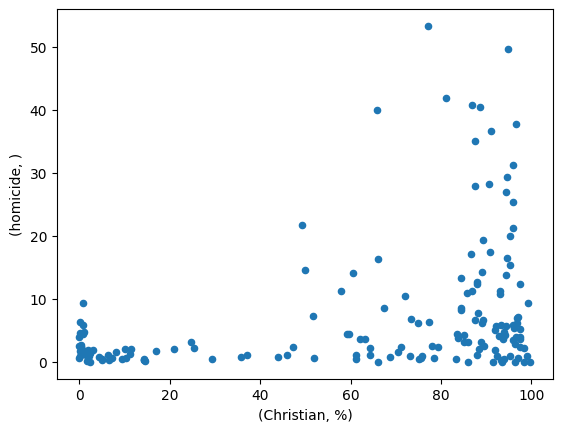

In [44]:
df[[("Christian","%"),("homicide","")]].plot.scatter(x=("Christian","%"),y=("homicide",""))

In [45]:
df[[("Hindu","%"),("homicide","")]].corr()

,,Hindu,homicide
,,%,
Hindu,%,1.000000,-0.024014
homicide,,-0.024014,1.000000


<Axes: xlabel='(Hindu, %)', ylabel='(homicide, )'>

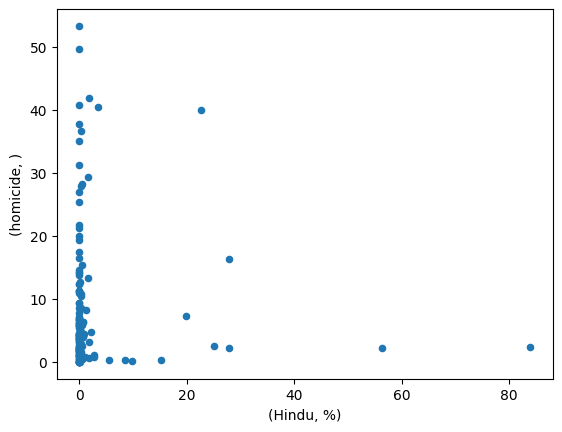

In [46]:
df[[("Hindu","%"),("homicide","")]].plot.scatter(x=("Hindu","%"),y=("homicide",""))

In [47]:
df[[("Irreligion","%"),("homicide","")]].corr()

,,Irreligion,homicide
,,%,
Irreligion,%,1.000000,-0.096189
homicide,,-0.096189,1.000000


<Axes: xlabel='(Irreligion, %)', ylabel='(homicide, )'>

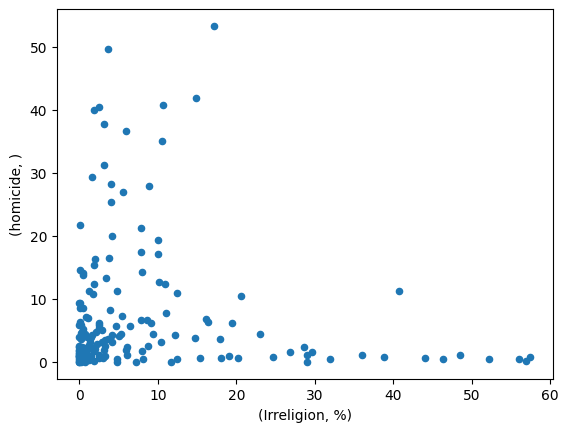

In [48]:
df[[("Irreligion","%"),("homicide","")]].plot.scatter(x=("Irreligion","%"),y=("homicide",""))

<Axes: xlabel='(gdp, )', ylabel='(homicide, )'>

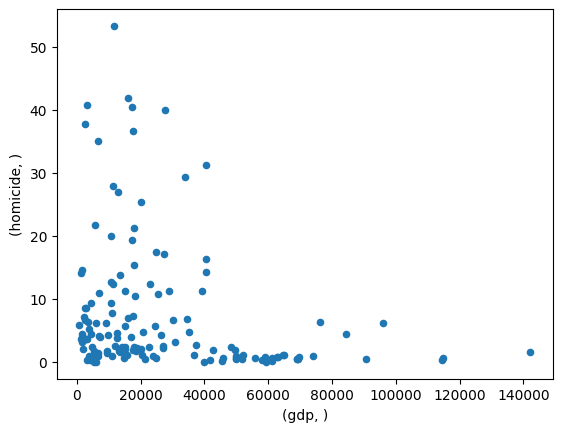

In [49]:
df[[("gdp",""),("homicide","")]].plot.scatter(x=("gdp",""),y=("homicide",""))

In [60]:
df[[("Muslim","%"),("corruption","")]].corr()

,,Muslim,corruption
,,%,
Muslim,%,1.000000,-0.396806
corruption,,-0.396806,1.000000


<Axes: xlabel='(Muslim, %)', ylabel='(corruption, )'>

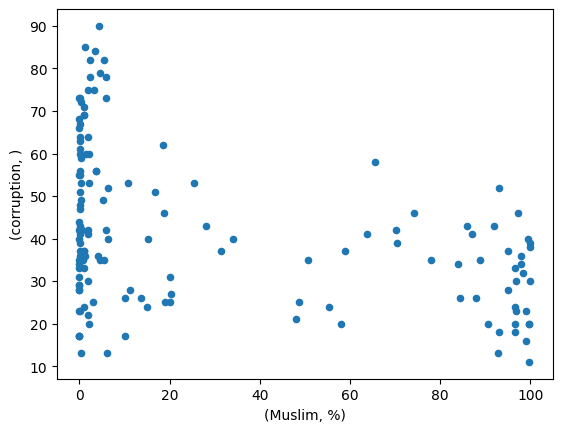

In [62]:
df[[("Muslim","%"),("corruption","")]].plot.scatter(x=("Muslim","%"),y=("corruption",""))

In [63]:
df[[("Christian","%"),("corruption","")]].corr()

,,Christian,corruption
,,%,
Christian,%,1.000000,0.174124
corruption,,0.174124,1.000000


<Axes: xlabel='(Christian, %)', ylabel='(corruption, )'>

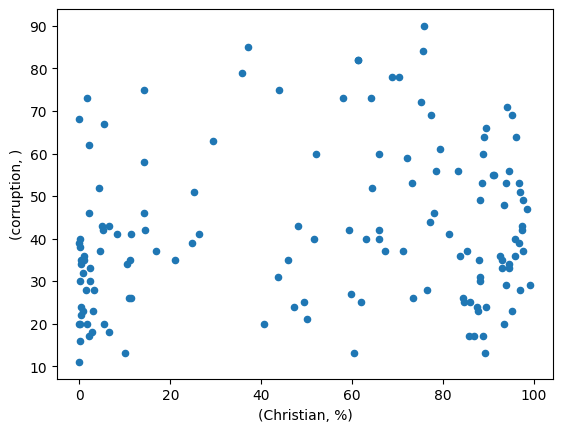

In [77]:
df[[("Christian","%"),("corruption","")]].plot.scatter(x=("Christian","%"),y=("corruption",""))

In [78]:
df[[("gdp",""),("corruption","")]].corr()

,,gdp,corruption
,,,
gdp,,1.000000,0.723425
corruption,,0.723425,1.000000


<Axes: xlabel='(gdp, )', ylabel='(corruption, )'>

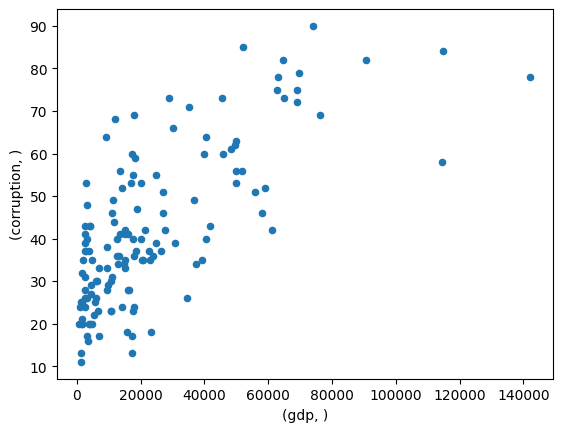

In [79]:
df[[("gdp",""),("corruption","")]].plot.scatter(x=("gdp",""),y=("corruption",""))

In [71]:
df[("trust_factor","")] = 100/df[("corruption","")]

/var/folders/9p/k_4f02t961360ccdlst6p_fc0000gn/T/ipykernel_42233/3246505252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[("trust_factor","")] = 100/df[("corruption","")]


In [73]:
df[("normalized_homicide","")] = df[("homicide","")]*df[("trust_factor","")]

/var/folders/9p/k_4f02t961360ccdlst6p_fc0000gn/T/ipykernel_42233/3273474851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[("normalized_homicide","")] = df[("homicide","")]*df[("trust_factor","")]


In [74]:
df[[("Muslim","%"),("normalized_homicide","")]].corr()

,,Muslim,normalized_homicide
,,%,
Muslim,%,1.000000,-0.223702
normalized_homicide,,-0.223702,1.000000


<Axes: xlabel='(Muslim, %)', ylabel='(normalized_homicide, )'>

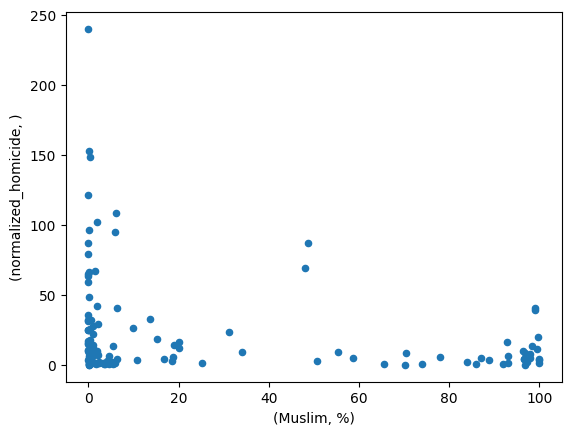

In [76]:
df[[("Muslim","%"),("normalized_homicide","")]].plot.scatter(x=("Muslim","%"),y=("normalized_homicide",""))